In [4]:
import tensorflow as tf
a=tf.constant([[1,2,3],[4,5,6]])
print(a)
print(a.shape)
print(a.dtype)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)
(2, 3)
<dtype: 'int32'>


In [5]:
a[:,:1] # 인덱싱

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[1],
       [4]])>

In [6]:
a_1=a[...,1]
a_2=a[...,1,tf.newaxis]
print(a_1)
print(a_2)

tf.Tensor([2 5], shape=(2,), dtype=int32)
tf.Tensor(
[[2]
 [5]], shape=(2, 1), dtype=int32)


In [7]:
b_0=a+100
b_1=tf.square(a) # 제곱
print(b_0)
print(b_1)

tf.Tensor(
[[101 102 103]
 [104 105 106]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[ 1  4  9]
 [16 25 36]], shape=(2, 3), dtype=int32)


In [8]:
a.numpy() # 넘파이자료와 상호호환성

array([[1, 2, 3],
       [4, 5, 6]])

In [9]:
import numpy as np
c=np.array([[1,2],[3,4],[5,6]])
d_1=tf.transpose(c)
d_2=c.T

In [10]:
print(c)
print(d_1)
print(d_2)

[[1 2]
 [3 4]
 [5 6]]
tf.Tensor(
[[1 3 5]
 [2 4 6]], shape=(2, 3), dtype=int32)
[[1 3 5]
 [2 4 6]]


In [11]:
t1=1
t2=100.
tf.cast(t1,tf.float32)+t2

<tf.Tensor: shape=(), dtype=float32, numpy=101.0>

In [15]:
k=tf.Variable([[1.,2,3],[4,5,6]])
print(k)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>


In [13]:
tf.constant([[1,2,3],[4,5,6]])

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [16]:
k.assign(k**2)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [17]:
k[0,1].assign(100)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[  1., 100.,   9.],
       [ 16.,  25.,  36.]], dtype=float32)>

In [18]:
k[:,2].assign([0,0])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[  1., 100.,   0.],
       [ 16.,  25.,   0.]], dtype=float32)>

In [19]:
k.scatter_nd_update(indices=[[0,0],[1,0]],updates=[999,999])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[999., 100.,   0.],
       [999.,  25.,   0.]], dtype=float32)>

In [20]:
import tensorflow as tf
x=tf.constant([[[1,2,3,4],[5,6,7,8],[9,10,11,12]],
              [[13,14,15,16],[17,18,19,20],[21,22,23,24]]])
print(x.numpy())
tf.transpose(x)

[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]]


<tf.Tensor: shape=(4, 3, 2), dtype=int32, numpy=
array([[[ 1, 13],
        [ 5, 17],
        [ 9, 21]],

       [[ 2, 14],
        [ 6, 18],
        [10, 22]],

       [[ 3, 15],
        [ 7, 19],
        [11, 23]],

       [[ 4, 16],
        [ 8, 20],
        [12, 24]]])>

In [21]:
tf.transpose(x, perm=(0,2,1))

<tf.Tensor: shape=(2, 4, 3), dtype=int32, numpy=
array([[[ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11],
        [ 4,  8, 12]],

       [[13, 17, 21],
        [14, 18, 22],
        [15, 19, 23],
        [16, 20, 24]]])>

In [22]:
import tensorflow as tf
a=[1.2,3.4,7.5,4.1,5.0,1.0,5.2]
ds=tf.data.Dataset.from_tensor_slices(a)
print(ds)
for i in ds:
    print(i.numpy())

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.float32, name=None)>
1.2
3.4
7.5
4.1
5.0
1.0
5.2


In [23]:
ds_batch=ds.batch(3, drop_remainder=True) # 3개씩 자르고 나머진 빼라
for i, elem in enumerate(ds_batch,1):
    print('batch {}:' .format (i), elem.numpy())

batch 1: [1.2 3.4 7.5]
batch 2: [4.1 5.  1. ]


In [24]:
ds_batch=ds.batch(3, drop_remainder=True)
#print(ds_batch.numpy())
print(ds_batch)

<BatchDataset element_spec=TensorSpec(shape=(3,), dtype=tf.float32, name=None)>


In [33]:
t_x=tf.random.uniform([4,3], dtype=tf.float32) # 4X3
t_y=tf.range(4) # 0, 1, 2, 3
ds_xy=tf.data.Dataset.from_tensor_slices((t_x,t_y)) # 쌍으로 만들어준다. 특성변수-목적변수
for example in ds_xy:
    print(example[0].numpy(),example[1].numpy())

[0.72678065 0.05469286 0.72026813] 0
[0.02090216 0.0309     0.01866543] 1
[0.09986293 0.18071842 0.5847012 ] 2
[0.13194263 0.44231617 0.8260484 ] 3


In [26]:
ds_transform=ds_xy.map(lambda x,y:(x*2-1.0,y)) # x 변환, y 그대로
for example in ds_transform:
    print(example[0].numpy(),example[1].numpy())

[-0.36896896 -0.5719404   0.1327653 ] 0
[-0.7843163  -0.8943162   0.45365572] 1
[-0.3776474   0.3575983   0.89379025] 2
[-0.07458925 -0.90573215  0.7047641 ] 3


In [27]:
ds=ds_xy.batch(3)
for example in ds:
    print(example[0].numpy(),example[1].numpy())   

[[0.31551552 0.21402979 0.56638265]
 [0.10784185 0.0528419  0.72682786]
 [0.3111763  0.67879915 0.9468951 ]] [0 1 2]
[[0.46270537 0.04713392 0.85238206]] [3]


In [28]:
ds=ds_xy.batch(3).repeat(2)
for example in ds:
    print(example[0].numpy(),example[1].numpy())   

[[0.31551552 0.21402979 0.56638265]
 [0.10784185 0.0528419  0.72682786]
 [0.3111763  0.67879915 0.9468951 ]] [0 1 2]
[[0.46270537 0.04713392 0.85238206]] [3]
[[0.31551552 0.21402979 0.56638265]
 [0.10784185 0.0528419  0.72682786]
 [0.3111763  0.67879915 0.9468951 ]] [0 1 2]
[[0.46270537 0.04713392 0.85238206]] [3]


In [29]:
ds=ds_xy.shuffle(4).batch(3).repeat(2)
for example in ds:
    print(example[0].numpy())
    print(example[1].numpy())

[[0.31551552 0.21402979 0.56638265]
 [0.46270537 0.04713392 0.85238206]
 [0.3111763  0.67879915 0.9468951 ]]
[0 3 2]
[[0.10784185 0.0528419  0.72682786]]
[1]
[[0.46270537 0.04713392 0.85238206]
 [0.31551552 0.21402979 0.56638265]
 [0.10784185 0.0528419  0.72682786]]
[3 0 1]
[[0.3111763  0.67879915 0.9468951 ]]
[2]


In [1]:
import tarfile
import os
import glob
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import get_file

In [31]:
data_url='https://datashare.is.ed.ac.uk/bitstream/handle/10283/3192/CINIC-10.tar.gz?sequence=4&isAllowed=y'
data_name='cinic10.tar.gz'
downloaded_location=get_file(origin=data_url,fname=data_name,extract=False)

687554560/687544992 [==============================] - 4618s 7us/step


In [34]:
print(downloaded_location)

C:\Users\ellyj\.keras\datasets\cinic10.tar.gz


In [35]:
data_directory,aa=downloaded_location.rsplit(os.path.sep, maxsplit=1) # 프로그래머 언어
print(data_directory)
print(aa)

C:\Users\ellyj\.keras\datasets
cinic10.tar.gz


In [ ]:
data_directory=os.path.sep.join([data_directory,'cinic10'])#sep를쓰면 element가 하나이므로 []으로 하나로 묶어야함
print(data_directory)

In [37]:
data_directory=os.path.join(data_directory,'cinic10') # 폴더 만들기
print(data_directory)

C:\Users\ellyj\.keras\datasets\cinic10


In [38]:
tar=tarfile.open(downloaded_location) # zip 파일 열기

In [39]:
if not os.path.exists(data_directory):
    tar.extractall(data_directory)

In [40]:
train=os.path.join(data_directory,'train\*\*.png')
test=os.path.join(data_directory,'test/*/*.png')
validation=os.path.join(data_directory,'valid/*/*.png')

In [5]:
# 데이터 미리 다운 받아서 이걸로
train=os.path.join('C:\\Users\\ellyj\\.keras\\datasets\\cinic10','train\*\*.png')
test=os.path.join('C:\\Users\\ellyj\\.keras\\datasets\\cinic10','test/*/*.png')
validation=os.path.join('C:\\Users\\ellyj\\.keras\\datasets\\cinic10','valid/*/*.png')

In [41]:
print(train)
print(tf.strings.split(train,os.path.sep)[-2])
datapath=tf.data.Dataset.list_files(train)
print(datapath)

C:\Users\ellyj\.keras\datasets\cinic10\train\*\*.png
tf.Tensor(b'*', shape=(), dtype=string)
<ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>


In [7]:
batch_size=128
buffer_size=1024
cinic_mean_rgb=np.array([0.47889522,0.47227842,0.43047404])
print(cinic_mean_rgb)
cinic10_classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

[0.47889522 0.47227842 0.43047404]


In [8]:
def prepare_data(data_pattern,shuffle=False):
    dataset=tf.data.Dataset.list_files(data_pattern).map(load_image_and_label).batch(batch_size)
    if shuffle:
        dataset=dataset.shuffle(buffer_size)
    return dataset.prefetch(batch_size)

In [9]:
def load_image_and_label(image_path,target_size=(32,32)):
    image=tf.io.read_file(image_path)
    image=tf.image.decode_png(image,channels=3)#png로 입력된 데이터를 tensor로 출력(decoded)텐서의 channel을 조절
    image=tf.image.convert_image_dtype(image,np.float32)
    image-=cinic_mean_rgb
    image=tf.image.resize(image, target_size)#(32,32,3)으로 출력함
    label=tf.strings.split(image_path,os.path.sep)[-2]
    label=(label==cinic10_classes)#one-hot encoding
    label=tf.dtypes.cast(label,tf.float32)
    return image, label  

In [10]:
train_data=prepare_data(train,shuffle=True)
print(train_data)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>


In [12]:
# !pip install tensorflow_datasets

     ---------------------------------------- 4.2/4.2 MB 11.6 MB/s eta 0:00:00
     ---------------------------------------- 48.8/48.8 KB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 86.9/86.9 KB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 241.5/241.5 KB 7.2 MB/s eta 0:00:00
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21494 sha256=73dc0580477f51d5ca7af98cd8524ecd9c9cd2b559d73028b92e76361f4ebdb5
  Stored in directory: c:\users\ellyj\appdata\local\pip\cache\wheels\54\aa\01\724885182f93150035a2a91bce34a12877e8067a97baaf5dc8
Successfully built promise


In [13]:
import tensorflow_datasets as tfds

In [14]:
print(len(tfds.list_builders()))
print(tfds.list_builders())

310
['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'arc', 'asset', 'assin2', 'bair_robot_pushing_small', 'bccd', 'beans', 'bee_dataset', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'blimp', 'booksum', 'bool_q', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cardiotox', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'cherry_blossoms', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'coqa', 'cos_e', 'cosmos_qa', 'covid19', 'covid19sum', 'crema_d', 'cs_restaurants', 'curated_breast_imaging_ddsm', 'cycle_gan', 'd4rl_adroit_door', 'd4rl_adroit_hammer', 'd4rl_adroit_pen', 'd4rl_adroit_relocate', 'd4rl

In [15]:
trans, trans_info=tfds.load('ted_hrlr_translate/pt_to_en', with_info=True, shuffle_files=False)
print(trans_info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\ellyj\tensorflow_datasets\ted_hrlr_translate\pt_to_en\1.0.0.incompleteOWQTEY\ted_hrlr_trans…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\ellyj\tensorflow_datasets\ted_hrlr_translate\pt_to_en\1.0.0.incompleteOWQTEY\ted_hrlr_trans…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\ellyj\tensorflow_datasets\ted_hrlr_translate\pt_to_en\1.0.0.incompleteOWQTEY\ted_hrlr_trans…

Dataset ted_hrlr_translate downloaded and prepared to C:\Users\ellyj\tensorflow_datasets\ted_hrlr_translate\pt_to_en\1.0.0. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='ted_hrlr_translate',
    full_name='ted_hrlr_translate/pt_to_en/1.0.0',
    description="""
    Data sets derived from TED talk transcripts for comparing similar language pairs
    where one is high resource and the other is low resource.
    """,
    config_description="""
    Translation dataset from pt to en in plain text.
    """,
    homepage='https://github.com/neulab/word-embeddings-for-nmt',
    data_path='C:\\Users\\ellyj\\tensorflow_datasets\\ted_hrlr_translate\\pt_to_en\\1.0.0',
    download_size=124.94 MiB,
    dataset_size=10.89 MiB,
    features=Translation({
        'en': Text(shape=(), dtype=tf.string),
        'pt': Text(shape=(), dtype=tf.string),
    }),
    supervised_keys=('pt', 'en'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=1803, 

In [16]:
celeb, celeb_info=tfds.load('celeb_a',with_info=True, shuffle_files=False)
print(celeb_info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

NonMatchingChecksumError: Artifact https://drive.google.com/uc?export=download&id=0B7EVK8r0v71pZjFTYXZWM3FlRnM, downloaded to C:\Users\ellyj\tensorflow_datasets\downloads\ucexport_download_id_0B7EVK8r0v71pZjFTYXZWM3FlDDaXUAQO8EGH_a7VqGNLRtW52mva1LzDrb-V723OQN8.tmp.a0f16dc6162d43da8b64ddd0134b56dd\ServiceLogin, has wrong checksum:
* Expected: UrlInfo(size=1.34 GiB, checksum='46fb89443c578308acf364d7d379fe1b9efb793042c0af734b6112e4fd3a8c74', filename='img_align_celeba.zip')
* Got: UrlInfo(size=91.88 KiB, checksum='007cea103f193e593a89660f8cf3e35abed1d6eebd4d896f54bcfc4a0223c8fd', filename='ServiceLogin')
To debug, see: https://www.tensorflow.org/datasets/overview#fixing_nonmatchingchecksumerror

In [17]:
mnist, mnist_info=tfds.load('mnist',with_info=True, shuffle_files=False)
print(mnist_info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\ellyj\tensorflow_datasets\mnist\3.0.1.incomplete0SSPN7\mnist-train.tfrecord*...:   0%|     …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\ellyj\tensorflow_datasets\mnist\3.0.1.incomplete0SSPN7\mnist-test.tfrecord*...:   0%|      …

Dataset mnist downloaded and prepared to C:\Users\ellyj\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='C:\\Users\\ellyj\\tensorflow_datasets\\mnist\\3.0.1',
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT 

In [18]:
print(mnist.keys())

dict_keys([Split('train'), Split('test')])


In [19]:
ds_train=mnist['train']
print(len(ds_train))
ds_train=ds_train.map(lambda item:(item['image'],item['label']))
ds_train=ds_train.shuffle(50000).batch(50000)
batch=next(iter(ds_train))
print(batch[0].shape, batch[1].shape)

60000
(50000, 28, 28, 1) (50000,)


In [20]:
import numpy as np
import pandas as pd
ds_test=mnist['test']
print(len(ds_test))
ds_test=ds_test.map(lambda item:(item['image'],item['label']))
ds_test=next(iter(ds_test))
print(ds_test[0].shape, ds_test[1].shape)

10000
(28, 28, 1) ()


In [21]:
from tensorflow.keras.datasets import cifar100
(x_train,y_train),(x_test,y_test)=cifar100.load_data()
print(x_train.shape,x_test.shape)

169017344/169001437 [==============================] - 96s 1us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)


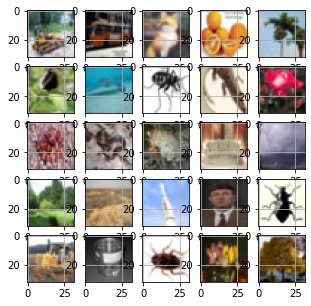

In [22]:
import numpy as np
import matplotlib.pyplot as plt
indices=np.random.randint(0,x_train.shape[0],size=25)
images=x_train[indices]
labels=y_train[indices]
# 4개 표본 그림그리기
plt.figure(figsize=(5,5))
for i in range(len(indices)):
    plt.subplot(5,5,i+1)
    image=images[i]
    plt.imshow(image)
    plt.grid('off')
plt.show()

# 1. MLP

## Sequential API

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
#데이터 불러오기
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

11501568/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)


In [24]:
import tensorflow.keras
tensorflow.keras.__version__

'2.8.0'

In [25]:
unique,counts=np.unique(y_train,return_counts=True)
print('Train labels:',dict(zip(unique,counts)))
unique,counts=np.unique(y_test,return_counts=True)
print('Test labels:',dict(zip(unique,counts)))

Train labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


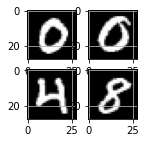

In [26]:
# 4개의 임의 표본 추출하기
indices=np.random.randint(0,x_train.shape[0],size=4)
images=x_train[indices]
labels=y_train[indices]
# 4개 표본 그림그리기
plt.figure(figsize=(2,2))
for i in range(len(indices)):
    plt.subplot(2,2,i+1)
    image=images[i]
    plt.imshow(image, cmap='gray')
    plt.grid('off')
plt.show()

In [27]:
# one-hot coding을 위한 라이브러리 불러오기
from tensorflow.keras.utils import to_categorical, plot_model
num_features=784  #x_train.shape[1]*x_train.shape[2]
x_train=x_train.reshape(-1,num_features)# 또는 np.reshape(x_train, (-1,num_features)).astype('float32')
x_test=x_test.reshape(-1,num_features)

#reshape안에 '-1'대신 x_train.shape[0]을 써도 되지만 '-1'을 해줌으로써 해당 axis의 값을 스스로 계산하게 한다.
#예를 들어 x의 shape이 (100,200,3)일 때 x.reshape(-1,100)으로 하면 x의 shape은 (600,100)으로 된다.

x_train=x_train/255.
x_test=x_test/255.

# 10개의 범주형 자료를 one-hot 벡터로 바꿔주기
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
num_classes=y_train.shape[1]
print(y_train.shape)

(60000, 10)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


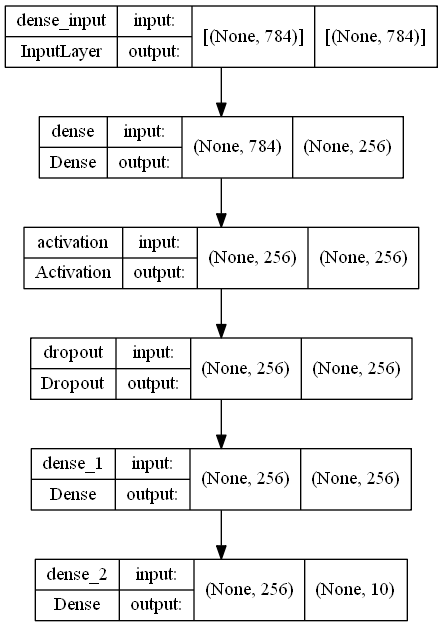

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
#2개의 은닉층과 1개의 출력층으로 구성된 MLP모형
model=Sequential()
model.add(Dense(256,input_dim=num_features)) #input은 1D tensor
model.add(Activation('relu'))
# 또는 model.add(Dense(256, input_dim=num_features,activation='relu'))로 Dense와 Activation을 함께 쓸 수 있음
model.add(Dropout(0.45))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.summary()
plot_model(model,#to_file='C:/Users/yspark/Desktop/딥러닝교재/제 4장 TensorFlow 2.x-Keras/ch4_1.png', 
           show_shapes=True)

데이터를 입력하지 않아도 모델을 만드는 거 만으로도 모델의 구조를 그림으로 보여준다.

In [29]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]
print(partial_x_train.shape)
print(partial_y_train.shape)

(50000, 784)
(50000, 10)


In [30]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
history=model.fit(partial_x_train, partial_y_train, epochs=10, batch_size=64,validation_data=(x_val,y_val))
history_out=history.history
history_out.keys()

Epoch 1/10
782/782 [==============================] - 7s 7ms/step - loss: 0.3315 - accuracy: 0.8994 - val_loss: 0.1351 - val_accuracy: 0.9591
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 0.1682 - accuracy: 0.9485 - val_loss: 0.1027 - val_accuracy: 0.9690
Epoch 3/10
782/782 [==============================] - 5s 7ms/step - loss: 0.1325 - accuracy: 0.9599 - val_loss: 0.0888 - val_accuracy: 0.9739
Epoch 4/10
782/782 [==============================] - 5s 7ms/step - loss: 0.1114 - accuracy: 0.9645 - val_loss: 0.0854 - val_accuracy: 0.9743
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0996 - accuracy: 0.9684 - val_loss: 0.0840 - val_accuracy: 0.9737
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0895 - accuracy: 0.9710 - val_loss: 0.0767 - val_accuracy: 0.9780
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0818 - accuracy: 0.9730 - val_loss: 0.0757 - val_accuracy: 0.9789
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

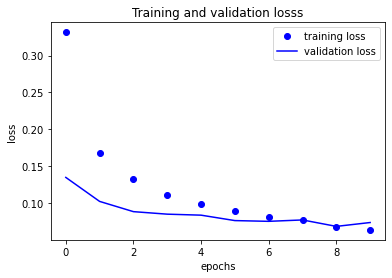

In [31]:
import matplotlib.pyplot as plt

loss=history_out['loss']
loss_val=history_out['val_loss']
accuracy=history_out['accuracy']
accuracy_val=history_out['val_accuracy']
plt.plot(loss,'bo',label='training loss')
plt.plot( loss_val,'b', label='validation loss' )
plt.title('Training and validation losss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

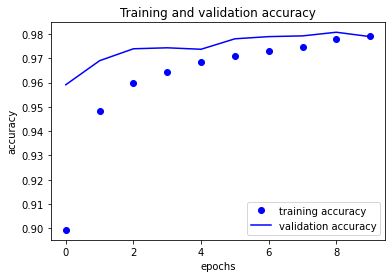

In [32]:
plt.clf()
plt.plot(accuracy,'bo',label='training accuracy')
plt.plot(accuracy_val,'b', label='validation accuracy' )
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [33]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=30,batch_size=64)


Epoch 1/30
938/938 [==============================] - 6s 6ms/step - loss: 0.0739 - accuracy: 0.9767
Epoch 2/30
938/938 [==============================] - 5s 5ms/step - loss: 0.0682 - accuracy: 0.9778
Epoch 3/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0630 - accuracy: 0.9793
Epoch 4/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0611 - accuracy: 0.9808
Epoch 5/30
938/938 [==============================] - 6s 6ms/step - loss: 0.0565 - accuracy: 0.9819
Epoch 6/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0532 - accuracy: 0.9824
Epoch 7/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0521 - accuracy: 0.9833
Epoch 8/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0515 - accuracy: 0.9831
Epoch 9/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0488 - accuracy: 0.9841
Epoch 10/30
938/938 [==============================] - 6s 6ms/step - loss: 0.0464 - accuracy: 0.9848

In [34]:
import pandas as pd
result_train=model.evaluate(x_train,y_train)
result_test=model.evaluate(x_test,y_test)
print(result_train)
print(result_test)
pred=model.predict(x_test)
pred=pd.DataFrame(pred)
pred.head()

313/313 [==============================] - 1s 4ms/step - loss: 0.0681 - accuracy: 0.9842
[0.005657615140080452, 0.9984166622161865]
[0.06812296062707901, 0.9842000007629395]


,0,1,2,3,4,5,6,7,8,9
0,1.043048e-11,8.632717e-08,2.772566e-08,5.467511e-08,3.232244e-09,2.305100e-09,1.273431e-14,9.999999e-01,1.457331e-09,4.369125e-09
1,4.798557e-19,3.040226e-13,1.000000e+00,8.026442e-14,1.471308e-27,2.371388e-16,2.878025e-18,3.945459e-17,1.647160e-18,1.007233e-27
2,1.165813e-09,9.999998e-01,1.354298e-08,2.369558e-10,2.572277e-08,3.326263e-10,4.080241e-08,5.955065e-08,2.423617e-08,7.716652e-11
3,9.999977e-01,1.917316e-15,3.446691e-08,1.368534e-10,1.385897e-10,1.334357e-08,2.275907e-06,1.148908e-09,6.653850e-13,7.679508e-10
4,9.523777e-08,6.066204e-10,3.117956e-07,1.835092e-10,9.995003e-01,4.564068e-09,4.191539e-10,1.104303e-06,1.411098e-07,4.980335e-04


## Functional API

In [35]:
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Model
x=Input(shape=(num_features,))
h1=Dense(256, activation='relu')(x)
h1=Dropout(0.45)(h1)
h2=Dense(256, activation='relu')(h1)
out=Dense(num_classes, activation='softmax')(h2)
model=Model(inputs=x, outputs=out)

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])
model.fit(x_train,y_train,epochs=30,batch_size=64)

Epoch 1/30
938/938 [==============================] - 5s 5ms/step - loss: 0.3131 - acc: 0.9053
Epoch 2/30
938/938 [==============================] - 4s 5ms/step - loss: 0.1569 - acc: 0.9526
Epoch 3/30
938/938 [==============================] - 4s 4ms/step - loss: 0.1235 - acc: 0.9611
Epoch 4/30
938/938 [==============================] - 6s 6ms/step - loss: 0.1076 - acc: 0.9667
Epoch 5/30
938/938 [==============================] - 6s 6ms/step - loss: 0.0966 - acc: 0.9699
Epoch 6/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0882 - acc: 0.9720
Epoch 7/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0790 - acc: 0.9752
Epoch 8/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0752 - acc: 0.9758
Epoch 9/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0667 - acc: 0.9786
Epoch 10/30
938/938 [==============================] - 5s 6ms/step - loss: 0.0660 - acc: 0.9786
Epoch 11/30
938/938 [============================

## Subclassing API
맞춤형 API

In [37]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation,Layer 
# MyLayer가 자녀class, Layer가 부모class

class MyLayer(Layer):
    def __init__(self, out_dim):
        self.out=out_dim
        super(MyLayer,self).__init__()
    def build(self,input_shape):
        self.kernel=self.add_weight(shape=(input_shape[1],self.out),trainable=True)
        
    def call(self,inputs):
        return tf.matmul(inputs,self.kernel)

# 1번째 버전
model=tf.keras.Sequential([Dense(2,input_shape=(2,)),MyLayer(4),Activation('relu')])
model.summary()

# 2번째 버전
model1=tf.keras.Sequential()
model1.add(Dense(2, input_shape=(2,)))
model1.add(MyLayer(4))
model1.add(Activation('relu'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 6         
                                                                 
 my_layer (MyLayer)          (None, 4)                 8         
                                                                 
 activation_1 (Activation)   (None, 4)                 0         
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 2)                 6         
                                                                 
 my_layer_1 (MyLayer)        (None, 

위에꺼 순수하게 프로그래밍임. 반복해줄 꺼임.

In [ ]:
pip install --upgrade tensorflow-gpu